This notebook will basically detail the workflow involved in the segmentation of horseshoe bat call and compare its accuracy

-- Thejasvi Beleyur
2020-03-10

In [1]:
%matplotlib notebook

In [2]:
import datetime as dt
import sys
sys.path.append('..\\measure_horseshoe_bat_calls\\')
from tqdm.auto import tqdm

In [3]:
from measure_a_horseshoe_bat_call import *
from segment_horseshoebat_call import *

In [4]:
# mention which version of the segment_horseshoeabat_call has been loaded
from segment_horseshoebat_call import __version_segment_hbc
__version_segment_hbc

'0.0.1'

In [5]:
make_t = lambda X, fs: np.linspace(0,X.size/float(fs),X.size)

In [6]:
def check_accuracy_of_segmentation(cf_durn, fm_durn, peak_frequency = 100000,
                                   fs=250000, fm_bandwidth=10000, **kwargs):
    whole_call = fm_durn*2 + cf_durn

    eg_call = make_one_CFcall(whole_call, fm_durn, 100000,
                              fs, call_shape='staplepin',
                              fm_bandwidth=fm_bandwidth)

    cf, fm, info = segment_call_into_cf_fm(eg_call, fs,
                                           **kwargs)

    halfway =int(fm.size/2.0)

    obtained_cf_durn = np.round(np.sum(cf)/float(fs), 4)

    obtained_upfm_durn = np.round(np.sum(fm[:halfway])/float(fs),4)
    obtained_downfm_durn = np.round(np.sum(fm[halfway:])/float(fs),4)

    obtained = np.array([obtained_cf_durn, 
                               obtained_upfm_durn,
                               obtained_downfm_durn])
    expected = np.array([cf_durn,
                        fm_durn,
                        fm_durn])
    accuracy = obtained/expected

    return accuracy 

In [7]:
cf_durations = np.arange(0.01, 0.051, 0.005)
fm_durations = np.arange(0.5, 5.5, 1.5)*10**-3
fm_bandwidth = np.arange(10, 31, 5)*10**3 

parameter_space = np.array(np.meshgrid(cf_durations, fm_durations, fm_bandwidth)).T.reshape(-1,3)

In [8]:
parameter_space.shape

(180, 3)

In [9]:
output_accuracy = pd.DataFrame(data=parameter_space, columns = ['cf_durn','fm_durn','bandwidth'])
output_accuracy['cf_accuracy'] = np.tile(np.nan, output_accuracy.shape[0])
output_accuracy['upfm_accuracy'] = np.tile(np.nan, output_accuracy.shape[0])
output_accuracy['downfm_accuracy'] = np.tile(np.nan, output_accuracy.shape[0])



In [10]:
from IPython.display import Audio

In [11]:
for row, [cf_durn, fm_durn, fm_bw] in enumerate(parameter_space):
    output_accuracy.loc[row,'cf_accuracy':] = check_accuracy_of_segmentation(cf_durn, fm_durn, peak_percentage=0.995)

Audio('C:\\Users\\tbeleyur\\Desktop\\task_complete_sound.mp3', autoplay=True)

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

In [12]:
output_accuracy.columns

Index(['cf_durn', 'fm_durn', 'bandwidth', 'cf_accuracy', 'upfm_accuracy',
       'downfm_accuracy'],
      dtype='object')

In [13]:
def produce_summary_plot(accuracy_df):
    plt.figure(figsize=(5,10))
    plt.subplot(311)
    plt.plot(accuracy_df['cf_durn'], accuracy_df['cf_accuracy'],'*');plt.grid()
    plt.ylim(0.5,1.5);plt.yticks(np.arange(0.5,2.0,0.5));plt.ylabel('Relative CF duration accuracy')
    plt.xlabel('CF duration, seconds')
    plt.subplot(312)
    plt.plot(accuracy_df['fm_durn']-0.00015, accuracy_df['upfm_accuracy'],'*',label='up fm')
    plt.plot(accuracy_df['fm_durn']+0.00015, accuracy_df['upfm_accuracy'],'^', label='down fm')
    plt.legend();plt.ylabel('Relative FM duration accuracy')
    plt.xlabel('FM duration, seconds')
    plt.xticks(np.unique(accuracy_df['fm_durn']))
    plt.ylim(0,1.5);plt.grid()
    plt.subplot(313)
    plt.plot(accuracy_df['downfm_accuracy'], accuracy_df['upfm_accuracy'],'*');plt.grid()
    plt.ylabel('Relative UP FM duration accuracy')
    plt.xlabel('Relative DOWN FM duration accuracy')
    plt.ylim(0.5,1.5);plt.xticks(np.arange(0.5,2.0,0.5));
    plt.xlim(0.5,1.5);plt.yticks(np.arange(0.5,2.0,0.5));


<IPython.core.display.Javascript object>


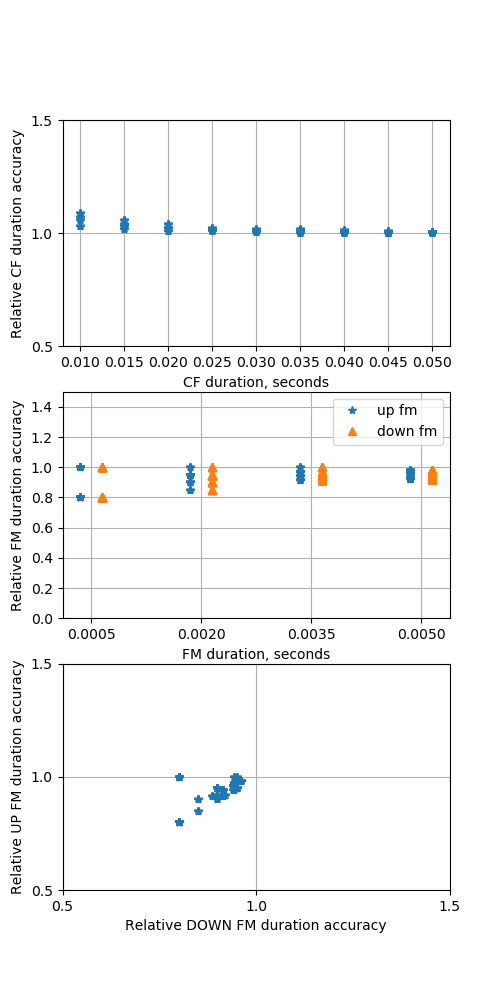

In [14]:
produce_summary_plot(output_accuracy)

There are some calls where the up and down fm are not being segmented with the same accuracy - which are these, and why is it happening so?

In [15]:
fm_odd = np.logical_and(output_accuracy['downfm_accuracy']<=0.85, output_accuracy['upfm_accuracy']>=0.95)
output_accuracy[fm_odd]

,cf_durn,fm_durn,bandwidth,cf_accuracy,upfm_accuracy,downfm_accuracy
24,0.040,0.0005,10000.0,1.002500,1.0,0.8
28,0.045,0.0005,10000.0,1.002222,1.0,0.8
32,0.050,0.0005,10000.0,1.000000,1.0,0.8
60,0.040,0.0005,15000.0,1.002500,1.0,0.8
64,0.045,0.0005,15000.0,1.002222,1.0,0.8
68,0.050,0.0005,15000.0,1.000000,1.0,0.8
96,0.040,0.0005,20000.0,1.002500,1.0,0.8
100,0.045,0.0005,20000.0,1.002222,1.0,0.8
104,0.050,0.0005,20000.0,1.000000,1.0,0.8
132,0.040,0.0005,25000.0,1.002500,1.0,0.8


#### A problem with very short FM calls?
The asymmetry in up-down FM segmentation seems to be especially strong for short FM calls. Lets investigate this further. 

In [16]:
fm_durn = 0.5*10**-3
cf_durn = 0.05
fs=250000
fm_bandwidth = 20000

whole_call = fm_durn*2 + cf_durn

eg_call = make_one_CFcall(whole_call, fm_durn, 100000,
                          fs, call_shape='staplepin',
                          fm_bandwidth=fm_bandwidth)

cf, fm, info = segment_call_into_cf_fm(eg_call, fs, peak_percentage=0.995)


C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


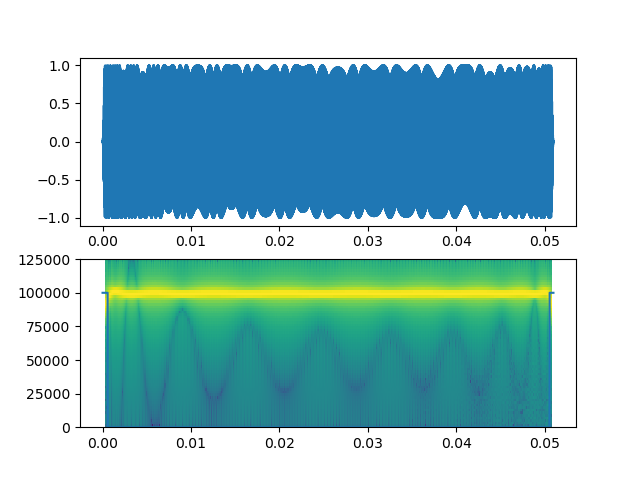

In [17]:
plt.figure()
q0 = plt.subplot(211)
plt.plot(make_t(eg_call,fs),eg_call)
plt.subplot(212, sharex=q0)
plt.specgram(eg_call, Fs=fs, NFFT=128,noverlap=127);
plt.plot(make_t(cf,fs),fm*100000)

<IPython.core.display.Javascript object>


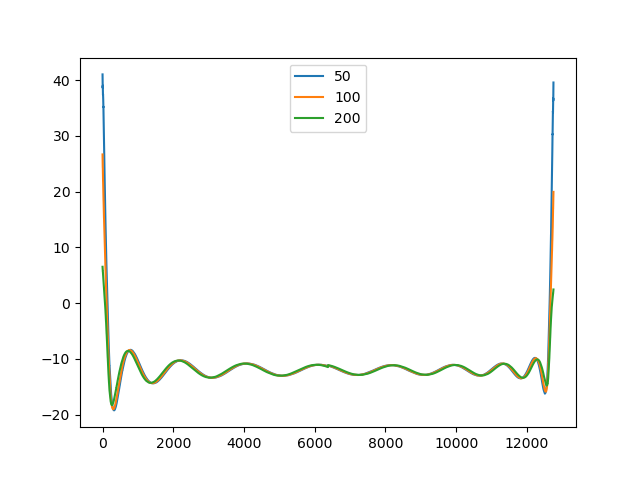

In [18]:
plt.figure()
for win_size in [50,100,200]:
    cf_dbrms, fm_dbrms = pre_process_for_segmentation(eg_call, fs, window_size=win_size)
    plt.plot(fm_dbrms-cf_dbrms, label=win_size)
plt.legend()
    


### The effect of window size:
Smaller window sizes for the moving rms calculations can lead to better segmentation - let's check segmentation across the parameter space 

In [19]:
window_size_accuracy = output_accuracy.copy()

In [20]:
for row, [cf_durn, fm_durn, fm_bw] in enumerate(parameter_space):
    window_size_accuracy.loc[row,'cf_accuracy':] = check_accuracy_of_segmentation(cf_durn, fm_durn, peak_percentage=0.995,
                                                                                 window_size=50)

Audio('C:\\Users\\tbeleyur\\Desktop\\task_complete_sound.mp3', autoplay=True)

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

<IPython.core.display.Javascript object>


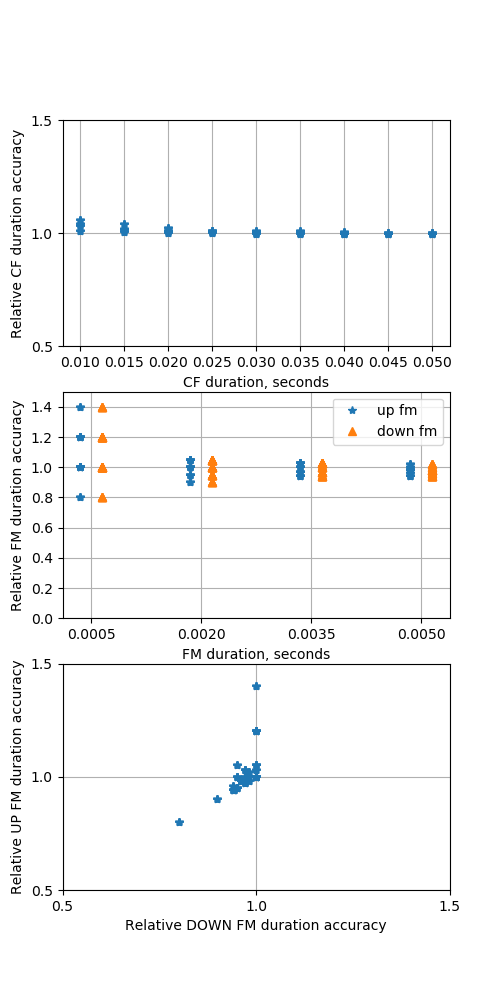

In [21]:
produce_summary_plot(window_size_accuracy)

### FM and CF are segmented better with shorter window sizes:
The accuracy has definitely gone up - though right now I'm also just wondering if the over-estimation of up FM durations has to do with how the synthesised CF calls are or whether it has to do with the elliptic filtering being done so close to the Nqyuist - and thus affecting things?. 

I can rule out the elliptic filtering part by simply re-sampling the example call. 

In [22]:
eg_call_up = signal.resample(eg_call, eg_call.size*2)
fs_new = fs*2

In [23]:
cf_up, fm_up, info_up = segment_call_into_cf_fm(eg_call_up, fs_new)
halfway_up = int(eg_call_up.size*0.5)

In [24]:
np.sum(cf_up)/fs_new

0.05006

In [25]:
np.sum(fm_up[:halfway_up])/fs_new, np.sum(fm_up[halfway_up:])/fs_new

(0.000528, 0.000412)

There does seem to be an effect of sampling rate for sure -- what does the accuracy look like if we up the sampling rate to 500 kHz. 

In [26]:
upsampled_accuracy = output_accuracy.copy()

In [27]:
for row, [cf_durn, fm_durn, fm_bw] in enumerate(parameter_space):
    window_size_accuracy.loc[row,'cf_accuracy':] = check_accuracy_of_segmentation(cf_durn, fm_durn,
                                                                                  fs=500000,
                                                                                  peak_percentage=0.995,
                                                                                  window_size=50)

Audio('C:\\Users\\tbeleyur\\Desktop\\task_complete_sound.mp3', autoplay=True)

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  imp

<IPython.core.display.Javascript object>


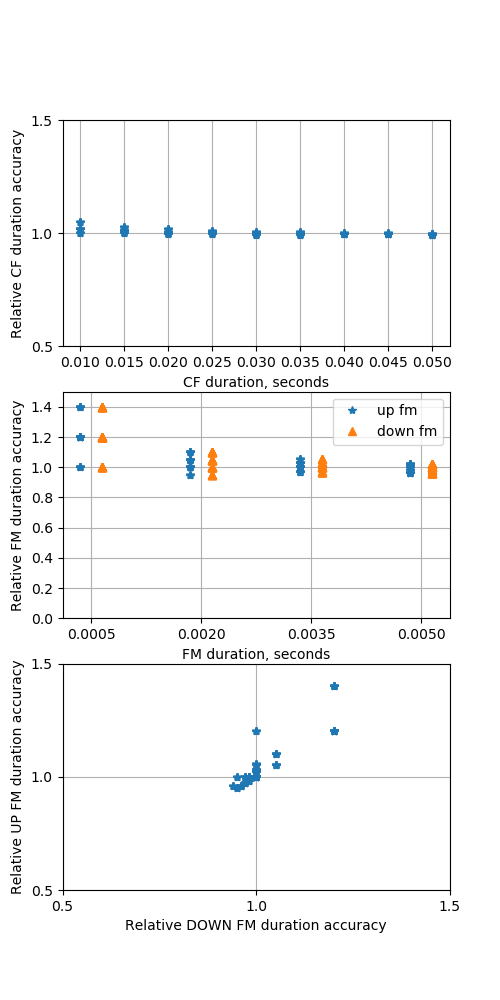

In [28]:
produce_summary_plot(window_size_accuracy)

### Short window sizes and high sampling rates make the best combination!! 
I can now achieve $0.8 \leq \:relative \:accuracy \leq 1.4$ for FM duration measurements, and a ~$1.0 $ relative accuracy for CF measurements. Of course this is all for very clean synthetic data - but this is already good proof that things work. 

In [29]:
print('This notebook was last run to the last cell on :', dt.datetime.now())

This notebook was last run to the last cell on : 2020-03-10 14:56:21.697495
